In [140]:
path= '\\Users\\stell\\OneDrive\\Dokumente\\fp55\\Daten\\'
path2='\\Users\\stell\\OneDrive\\Dokumente\\fp55\\Ergebnisse\\'

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline

In [141]:
data=np.genfromtxt(path+'tlwia2018-07-24_f0001-Replicate.txt', skip_header=1, skip_footer=14) #Daten importieren
datamonat=np.genfromtxt(path+'Regen_Monatsdurchschnitt.txt')
dataeinzel=np.genfromtxt(path+'Regen-Einzelevents.txt')

In [142]:
#MONATSDURCHSCHNITT
#Alte Daten einlesen und plotten

#Delta-Werte der drei Isotope einlesen
D=datamonat[:,6]
Derror=datamonat[:,7]
np.nan_to_num(Derror, copy=False)

O18=datamonat[:,8]
O18error=datamonat[:,9]
np.nan_to_num(O18error, copy=False)

O17=datamonat[:,10]
O17error=datamonat[:,11]
np.nan_to_num(O17error, copy=False)

#Startzeite der jeweiligen Messung
Jahrs=datamonat[:,2]
Monats=datamonat[:,1]
Tags=datamonat[:,0]

#Endzeiten der jeweiligen Messung
Jahre=datamonat[:,5]
Monate=datamonat[:,4]
Tage=datamonat[:,3]

#Berechne die Zeit in Tagen nach dem 1.12.2015
start=Jahrs*365+Monats*30+Tags-(2015*365+12*30)
stop=Jahre*365+Monate*30+Tage-(2015*365+12*30)
step=1

time=[]
d=[]
derror=[]
o18=[]
o18error=[]
o17=[]
o17error=[]

for i in range(0, len(start)):
    mi=np.arange(start[i], stop[i], step)
    repetition=len(mi)
    
    di=np.repeat(D[i], repetition) #Wiederhole den jeweiligen Mittelwert so oft, wie der Messbereich lang war
    derrori=np.repeat(Derror[i], repetition)
    
    o18i=np.repeat(O18[i], repetition)
    o18errori=np.repeat(O18error[i], repetition)
    
    o17i=np.repeat(O17[i], repetition)
    o17errori=np.repeat(O17error[i], repetition)
    
    time=np.append(time, mi) #Fülle Arrays mit den Wiederholungen bzw. Zeiten
    d=np.append(d, di)
    derror=np.append(derror, derrori)
    o18=np.append(o18, o18i)
    o18error=np.append(o18error, o18errori)
    o17=np.append(o17, o17i)
    o17error=np.append(o17error, o17errori)

In [143]:
#EINZELEVENTS
#Alte Daten einlesen und plotten

#Delta-Werte der drei Isotope einlesen
D1=dataeinzel[:,6]
Derror1=dataeinzel[:,7]
np.nan_to_num(Derror1, copy=False)

O181=dataeinzel[:,8]
O18error1=dataeinzel[:,9]
np.nan_to_num(O18error1, copy=False)

O171=dataeinzel[:,10]
O17error1=dataeinzel[:,11]
np.nan_to_num(O17error1, copy=False)

#Startzeite der jeweiligen Messung
Jahrs1=dataeinzel[:,2]
Monats1=dataeinzel[:,1]
Tags1=dataeinzel[:,0]

#Endzeiten der jeweiligen Messung
Jahre1=dataeinzel[:,5]
Monate1=dataeinzel[:,4]
Tage1=dataeinzel[:,3]

#Berechne die Zeit in Tagen nach dem 1.12.2015
start1=Jahrs1*365+Monats1*30+Tags1-(2015*365+12*30)
stop1=Jahre1*365+Monate1*30+Tage1-(2015*365+12*30)
step=1

time1=[]
d1=[]
derror1=[]
o181=[]
o18error1=[]
o171=[]
o17error1=[]

for i in range(0, len(start1)):
    mi=np.arange(start1[i], stop1[i], step)
    repetition=len(mi)
    
    di=np.repeat(D1[i], repetition) #Wiederhole den jeweiligen Mittelwert so oft, wie der Messbereich lang war
    derrori=np.repeat(Derror1[i], repetition)
    
    o18i=np.repeat(O181[i], repetition)
    o18errori=np.repeat(O18error1[i], repetition)
    
    o17i=np.repeat(O171[i], repetition)
    o17errori=np.repeat(O17error1[i], repetition)
    
    time1=np.append(time1, mi) #Fülle Arrays mit den Wiederholungen bzw. Zeiten
    d1=np.append(d1, di)
    derror1=np.append(derror1, derrori)
    o181=np.append(o181, o18i)
    o18error1=np.append(o18error1, o18errori)
    o171=np.append(o171, o17i)
    o17error1=np.append(o17error1, o17errori)

In [144]:
#Neue(eigene) Messung
D2=data[:,1] #Deuterium
Derror2=data[:,2]
np.nan_to_num(Derror2, copy=False) #wegen zu wenig Daten kann für einen Wert kein Fehler berechnet werden, dieser wird durch 0 ersetz

O182=data[:,3]
O18error2=data[:,4]
np.nan_to_num(O18error2, copy=False)

O172=data[:,5]
O17error2=data[:,6]
np.nan_to_num(O17error2, copy=False)

#Zeiten: m1=1.06.18-4.07.18, m2=24.05.18-1.06.18, m3=11.06.18-12.06.18

#Startzeite der jeweiligen Messung
Js=[2018, 2018, 2018]
Jahrs=np.asarray(Js)
Ms=[6, 5, 6]
Monats=np.asarray(Ms)
Ts=[1, 24, 11]
Tags=np.asarray(Ts)

#Endzeiten der jeweiligen Messung
Je=[2018, 2018, 2018]
Jahre=np.asarray(Js)
Me=[7, 6, 6]
Monate=np.asarray(Me)
Te=[4, 1, 12]
Tage=np.asarray(Te)

#Berechne die Zeit in Tagen nach dem 1.12.2015
start=Jahrs*365+Monats*30+Tags-(2015*365+12*30)
stop=Jahre*365+Monate*30+Tage-(2015*365+12*30)
step=1

time2=[]
d2=[]
derror2=[]
o182=[]
o18error2=[]
o172=[]
o17error2=[]

for i in range(0, len(start)):
    mi=np.arange(start[i], stop[i], step)
    repetition=len(mi)
    
    di=np.repeat(D2[i], repetition) #Wiederhole den jeweiligen Mittelwert so oft, wie der Messbereich lang war
    derrori=np.repeat(Derror2[i], repetition)
    
    o18i=np.repeat(O182[i], repetition)
    o18errori=np.repeat(O18error2[i], repetition)
    
    o17i=np.repeat(O172[i], repetition)
    o17errori=np.repeat(O17error2[i], repetition)
    
    time2=np.append(time2, mi) #Fülle Arrays mit den Wiederholungen bzw. Zeiten
    d2=np.append(d2, di)
    derror2=np.append(derror2, derrori)
    o182=np.append(o182, o18i)
    o18error2=np.append(o18error2, o18errori)
    o172=np.append(o172, o17i)
    o17error2=np.append(o17error2, o17errori)

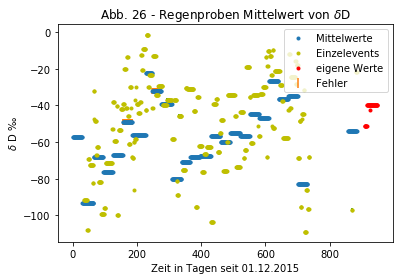

In [145]:
plt.plot(time, d, '.', label='Mittelwerte')
plt.errorbar(time, d, yerr=derror, linestyle='None', label='Fehler')
plt.plot(time1, d1, 'y.', label='Einzelevents')
plt.errorbar(time1, d1, yerr=derror1, linestyle='None')
plt.plot(time2, d2, 'r.', label='eigene Werte')
plt.errorbar(time2, d2, yerr=derror2, linestyle='None')

plt.ylabel('$\delta$ D ‰')
plt.xlabel('Zeit in Tagen seit 01.12.2015')
plt.title('Abb. 26 - Regenproben Mittelwert von $\delta$D')
plt.legend()
plt.savefig(path2+'Abb26.png')

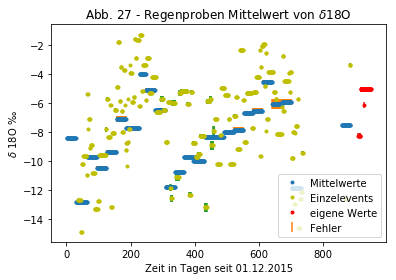

In [146]:
plt.plot(time, o18, '.', label='Mittelwerte')
plt.errorbar(time, o18, yerr=o18error, linestyle='None', label='Fehler')
plt.plot(time1, o181, 'y.', label='Einzelevents')
plt.errorbar(time1, o181, yerr=o18error1, linestyle='None')
plt.plot(time2, o182, 'r.', label='eigene Werte')
plt.errorbar(time2, o182, yerr=o18error2, linestyle='None')

plt.ylabel('$\delta$ 18O ‰')
plt.xlabel('Zeit in Tagen seit 01.12.2015')
plt.title('Abb. 27 - Regenproben Mittelwert von $\delta$18O')
plt.legend()
plt.savefig(path2+'Abb27.png')

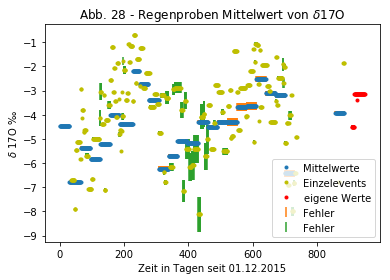

In [147]:
plt.plot(time, o17, '.', label='Mittelwerte')
plt.errorbar(time, o17, yerr=o17error, linestyle='None', label='Fehler')
plt.plot(time1, o171, 'y.', label='Einzelevents')
plt.errorbar(time1, o171, yerr=o17error1, linestyle='None', label='Fehler')
plt.plot(time2, o172, 'r.', label='eigene Werte')
plt.errorbar(time2, o172, yerr=o17error2, linestyle='None')

plt.ylabel('$\delta$ 17O ‰')
plt.xlabel('Zeit in Tagen seit 01.12.2015')
plt.title('Abb. 28 - Regenproben Mittelwert von $\delta$17O')
plt.legend()
plt.savefig(path2+'Abb28.png')

In [148]:
#Füge alle Arrays zusammen (Mittelwert, Einzelmessung und eigene Messung), damit sie alle in Fit der LMWL berücksichtigt werden
o18gesamt=[]
o18gesamt=np.append(o18gesamt, o18)
o18gesamt=np.append(o18gesamt, o181)
o18gesamt=np.append(o18gesamt, o182)

dgesamt=[]
dgesamt=np.append(dgesamt, d)
dgesamt=np.append(dgesamt, d1)
dgesamt=np.append(dgesamt, d2)

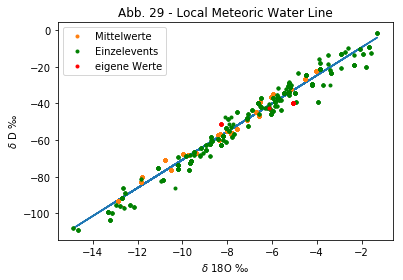

In [149]:
#Fitgerade
def line(x, a, b): 
    return a * x + b
popt, pcov = curve_fit(line, o18gesamt, dgesamt)

plt.plot(o18gesamt,line(o18gesamt, *popt))


plt.plot(o18, d, '.', label='Mittelwerte')
plt.errorbar(o18, d, yerr=derror, linestyle='None')

plt.plot(o181, d1, 'g.', label='Einzelevents')
plt.errorbar(o181, d1, yerr=derror1, linestyle='None')

plt.plot(o182, d2, 'r.', label='eigene Werte')
plt.errorbar(o182, d2, yerr=derror2, linestyle='None')

plt.ylabel('$\delta$ D ‰')
plt.xlabel('$\delta$ 18O ‰')
plt.title('Abb. 29 - Local Meteoric Water Line')
plt.legend()
plt.savefig(path2+'Abb29.png')

In [150]:
#Fitparameter
print("a =", popt[0], "+/-", pcov[0,0]**0.5) #in Promill
print("b =", popt[1], "+/-", pcov[1,1]**0.5) #in Promill

a = 7.678336491799478 +/- 0.03409232472769672
b = 5.9966899058336764 +/- 0.2772266058956878
